In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nltk import ngrams
from scipy.spatial import distance
from scipy.special import kl_div
from sklearn.metrics.pairwise import cosine_similarity,cosine_distances
from sklearn.metrics import mutual_info_score

In [2]:
in_file = open("waltz64-69-2.txt", 'r')
dataset = in_file.read()

In [3]:
len(dataset)

26528

In [4]:
in_file = open("generated-14.txt", 'r')
generated = in_file.read()

In [5]:
len(generated)

1921

In [6]:
words = sorted(tuple(set(dataset.split())))
n = len(words)

# create word-integer encoder/decoder
word2int = dict(zip(words, list(range(n))))
int2word = dict(zip(list(range(n)), words))

vocab_size = len(word2int)

In [7]:
vocab_size

108

In [8]:
encoded = [word2int[word] for word in dataset.split()]

In [9]:
encoded_generated = [word2int[word] for word in generated.split()]

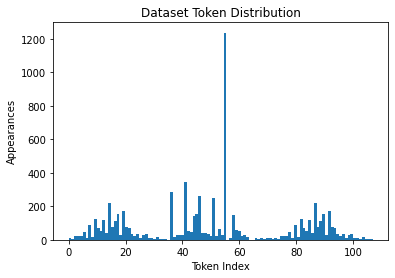

In [10]:
plt.figure()
data_hist = plt.hist(encoded, bins=108)
plt.ylabel("Appearances")
plt.xlabel("Token Index")
plt.title("Dataset Token Distribution")
#plt.savefig("data_hist.png", dpi=300)
plt.show()

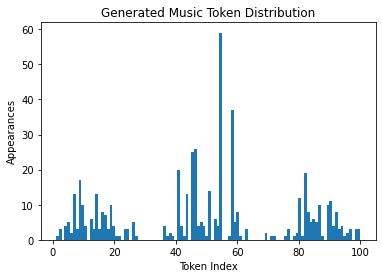

In [11]:
plt.figure()
generated_hist = plt.hist(encoded_generated, bins=108)
plt.ylabel("Appearances")
plt.xlabel("Token Index")
plt.title("Generated Music Token Distribution")
#plt.savefig("generated_hist.png", dpi=300)
plt.show()

In [12]:
data_dist = np.array(data_hist[0]) / np.sum(data_hist[0])

In [13]:
data_dist.shape

(108,)

In [14]:
generated_dist = np.array(generated_hist[0]) / np.sum(generated_hist[0])

In [15]:
generated_dist.shape

(108,)

In [16]:
cosine_similarity(data_dist.reshape(1, -1), generated_dist.reshape(1, -1))

array([[0.25600367]])

In [17]:
base = np.ones(data_dist.shape[0])/data_dist.shape[0]

In [18]:
cosine_similarity(data_dist.reshape(1, -1), base.reshape(1, -1))

array([[0.44629283]])

In [19]:
mutual_info_score(data_dist, generated_dist)

/home/utsha/cs395/cs395/lib/python3.6/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


1.681188878716563

In [20]:
mutual_info_score(data_dist, base)

/home/utsha/cs395/cs395/lib/python3.6/site-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.0

In [21]:
len(set(ngrams(encoded, 2)))

849

In [22]:
len(set(ngrams(encoded_generated, 2)))

296

In [23]:
bigram_words = sorted(tuple(set(ngrams(encoded, 2))))

In [24]:
bigram_words

[(0, 77),
 (0, 78),
 (1, 7),
 (2, 5),
 (2, 7),
 (2, 10),
 (2, 58),
 (2, 82),
 (3, 5),
 (3, 7),
 (3, 12),
 (3, 75),
 (4, 10),
 (4, 13),
 (4, 75),
 (4, 82),
 (4, 87),
 (5, 9),
 (5, 11),
 (5, 14),
 (5, 75),
 (5, 76),
 (5, 77),
 (5, 79),
 (5, 80),
 (5, 83),
 (5, 87),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 80),
 (6, 84),
 (6, 91),
 (7, 9),
 (7, 10),
 (7, 14),
 (7, 16),
 (7, 17),
 (7, 53),
 (7, 64),
 (7, 71),
 (7, 78),
 (7, 79),
 (7, 80),
 (7, 81),
 (7, 82),
 (7, 84),
 (7, 85),
 (7, 89),
 (7, 92),
 (8, 14),
 (8, 16),
 (8, 72),
 (8, 80),
 (8, 82),
 (9, 9),
 (9, 12),
 (9, 14),
 (9, 15),
 (9, 17),
 (9, 63),
 (9, 72),
 (9, 73),
 (9, 75),
 (9, 76),
 (9, 78),
 (9, 80),
 (9, 81),
 (9, 82),
 (9, 83),
 (9, 84),
 (9, 86),
 (9, 90),
 (9, 92),
 (9, 94),
 (9, 95),
 (10, 53),
 (10, 74),
 (10, 76),
 (10, 77),
 (10, 78),
 (10, 82),
 (10, 83),
 (10, 84),
 (10, 85),
 (10, 86),
 (10, 87),
 (11, 14),
 (11, 19),
 (11, 20),
 (11, 21),
 (11, 63),
 (11, 77),
 (11, 78),
 (11, 79),
 (11, 82),
 (11, 83),
 (11, 84),
 (11, 

In [25]:
base

array([0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925926,
       0.00925926, 0.00925926, 0.00925926, 0.00925926, 0.00925